<a href="https://colab.research.google.com/github/DB11051998/Kaggle-Predict-Future-Sales/blob/master/Sales_price_kaggle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
cd drive/My\ Drive/sales_price_kaggle

/content/drive/My Drive/sales_price_kaggle


In [2]:
ls

item_categories.csv  kaggle.json               sales_train.csv        shops.csv
items.csv            Sales_price_kaggle.ipynb  sample_submission.csv  test.csv


In [ ]:
! pip install -q kaggle

In [ ]:
 from google.colab import files

In [ ]:
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"debasish05","key":"56a1edba1795f73cb4fce7e1a11ff1c8"}'}

In [ ]:
! mkdir ~/.kaggle

In [ ]:
cd ..


/


In [ ]:
ls

bin/                                       etc/    opt/    sys/
boot/                                      home/   proc/   tensorflow-1.15.2/
content/                                   lib/    root/   tmp/
datalab/                                   lib32/  run/    tools/
dev/                                       lib64/  sbin/   usr/
dlib-19.18.0-cp27-cp27mu-linux_x86_64.whl  media/  srv/    var/
dlib-19.18.0-cp36-cp36m-linux_x86_64.whl   mnt/    swift/


In [ ]:
cd /content/drive

/content/drive


In [ ]:
cd sales_price_kaggle

/content/drive/My Drive/sales_price_kaggle


In [ ]:
! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets list

ref                                                         title                                             size  lastUpdated          downloadCount  
----------------------------------------------------------  -----------------------------------------------  -----  -------------------  -------------  
roche-data-science-coalition/uncover                        UNCOVER COVID-19 Challenge                       179MB  2020-05-21 18:57:53          16912  
mrgeislinger/bart-ridership                                 BART Ridership                                   325MB  2020-07-09 22:28:07             95  
vishnuvarthanrao/windows-store                              Windows Store                                     93KB  2020-07-07 12:29:07            494  
vzrenggamani/hanacaraka                                     Aksara Jawa / Hanacaraka                           9MB  2020-07-10 15:09:31             21  
mrmorj/restaurant-recommendation-challenge                  Restaurant Recommendat

In [ ]:
! kaggle competitions download -c competitive-data-science-predict-future-sales


  0% 0.00/3.49k [00:00<?, ?B/s]
100% 3.49k/3.49k [00:00<00:00, 478kB/s]
  0% 0.00/2.91k [00:00<?, ?B/s]
100% 2.91k/2.91k [00:00<00:00, 400kB/s]
  0% 0.00/368k [00:00<?, ?B/s]
100% 368k/368k [00:00<00:00, 24.5MB/s]
  0% 0.00/468k [00:00<?, ?B/s]
100% 468k/468k [00:00<00:00, 31.0MB/s]
  0% 0.00/1.02M [00:00<?, ?B/s]
100% 1.02M/1.02M [00:00<00:00, 65.1MB/s]
 38% 5.00M/13.3M [00:00<00:00, 20.9MB/s]
100% 13.3M/13.3M [00:00<00:00, 44.3MB/s]


In [ ]:
! unzip sample_submission.csv.zip  

Archive:  sample_submission.csv.zip
  inflating: sample_submission.csv   


In [3]:
ls

item_categories.csv  kaggle.json               sales_train.csv        shops.csv
items.csv            Sales_price_kaggle.ipynb  sample_submission.csv  test.csv


## Datas

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [5]:
item_cat=pd.read_csv('item_categories.csv')
test_data=pd.read_csv('test.csv')
item_data=pd.read_csv('items.csv')
sales_train=pd.read_csv('sales_train.csv')
shops_data=pd.read_csv('shops.csv')

In [6]:
item_cat.head()

,item_category_name,item_category_id
0,PC - Гарнитуры/Наушники,0
1,Аксессуары - PS2,1
2,Аксессуары - PS3,2
3,Аксессуары - PS4,3
4,Аксессуары - PSP,4


In [7]:
test_data.head()

,ID,shop_id,item_id
0,0,5,5037
1,1,5,5320
2,2,5,5233
3,3,5,5232
4,4,5,5268


In [8]:
item_data.head()

,item_name,item_id,item_category_id
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40
1,!ABBYY FineReader 12 Professional Edition Full...,1,76
2,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40
3,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40
4,***КОРОБКА (СТЕКЛО) D,4,40


In [9]:
shops_data.head()

,shop_name,shop_id
0,"!Якутск Орджоникидзе, 56 фран",0
1,"!Якутск ТЦ ""Центральный"" фран",1
2,"Адыгея ТЦ ""Мега""",2
3,"Балашиха ТРК ""Октябрь-Киномир""",3
4,"Волжский ТЦ ""Волга Молл""",4


In [10]:
sales_train.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0


In [79]:
pd.read_csv('/content/drive/My Drive/sales_price_kaggle/sample_submission.csv')

,ID,item_cnt_month
0,0,0.5
1,1,0.5
2,2,0.5
3,3,0.5
4,4,0.5
...,...,...
214195,214195,0.5
214196,214196,0.5
214197,214197,0.5
214198,214198,0.5


described

In [11]:
item_cat.describe()

,item_category_id
count,84.000000
mean,41.500000
std,24.392622
min,0.000000
25%,20.750000
50%,41.500000
75%,62.250000
max,83.000000


In [12]:
test_data.describe()

,ID,shop_id,item_id
count,214200.000000,214200.000000,214200.000000
mean,107099.500000,31.642857,11019.398627
std,61834.358168,17.561933,6252.644590
min,0.000000,2.000000,30.000000
25%,53549.750000,16.000000,5381.500000
50%,107099.500000,34.500000,11203.000000
75%,160649.250000,47.000000,16071.500000
max,214199.000000,59.000000,22167.000000


In [13]:
item_data.describe()

,item_id,item_category_id
count,22170.00000,22170.000000
mean,11084.50000,46.290753
std,6400.07207,15.941486
min,0.00000,0.000000
25%,5542.25000,37.000000
50%,11084.50000,40.000000
75%,16626.75000,58.000000
max,22169.00000,83.000000


In [14]:
shops_data.describe()

,shop_id
count,60.000000
mean,29.500000
std,17.464249
min,0.000000
25%,14.750000
50%,29.500000
75%,44.250000
max,59.000000


In [15]:
sales_train.describe()

,date_block_num,shop_id,item_id,item_price,item_cnt_day
count,2.935849e+06,2.935849e+06,2.935849e+06,2.935849e+06,2.935849e+06
mean,1.456991e+01,3.300173e+01,1.019723e+04,8.908532e+02,1.242641e+00
std,9.422988e+00,1.622697e+01,6.324297e+03,1.729800e+03,2.618834e+00
min,0.000000e+00,0.000000e+00,0.000000e+00,-1.000000e+00,-2.200000e+01
25%,7.000000e+00,2.200000e+01,4.476000e+03,2.490000e+02,1.000000e+00
50%,1.400000e+01,3.100000e+01,9.343000e+03,3.990000e+02,1.000000e+00
75%,2.300000e+01,4.700000e+01,1.568400e+04,9.990000e+02,1.000000e+00
max,3.300000e+01,5.900000e+01,2.216900e+04,3.079800e+05,2.169000e+03


## Exploratory Data Analysis

In [16]:
item_cat

,item_category_name,item_category_id
0,PC - Гарнитуры/Наушники,0
1,Аксессуары - PS2,1
2,Аксессуары - PS3,2
3,Аксессуары - PS4,3
4,Аксессуары - PSP,4
...,...,...
79,Служебные,79
80,Служебные - Билеты,80
81,Чистые носители (шпиль),81
82,Чистые носители (штучные),82


category Id 40 has the highest number of products

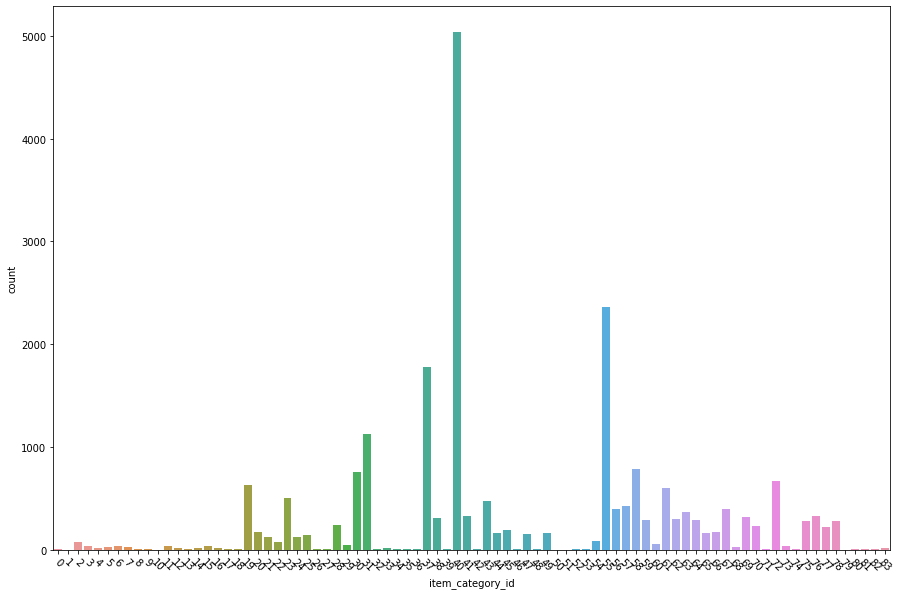

In [17]:
plt.figure(figsize=(15,10))
plt.xticks(rotation=-45)
sns.countplot(item_data['item_category_id'])

In [18]:
##let's combine item data and item_cat dataframe
item_merge_data=pd.merge(item_data, item_cat, on='item_category_id', how='outer')

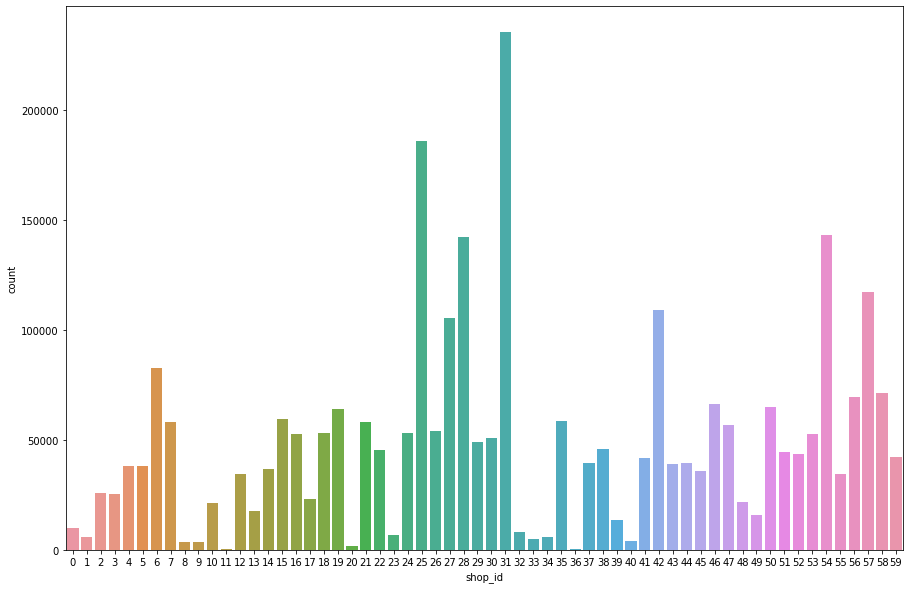

In [19]:
plt.figure(figsize=(15,10))
sns.countplot(sales_train['shop_id'])

In [20]:
## convert date to datetime format
sales_train['date']=pd.to_datetime(sales_train['date'])
sales_train.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,2013-02-01,0,59,22154,999.00,1.0
1,2013-03-01,0,25,2552,899.00,1.0
2,2013-05-01,0,25,2552,899.00,-1.0
3,2013-06-01,0,25,2554,1709.05,1.0
4,2013-01-15,0,25,2555,1099.00,1.0


In [21]:
merge_sales_train=pd.merge(sales_train,shops_data,on='shop_id',how='outer').sort_values(by='date',ignore_index=True)

In [22]:
merge_sales_train.set_index('date',inplace=True)

In [23]:
merge_sales_train.head()

,date_block_num,shop_id,item_id,item_price,item_cnt_day,shop_name
date,,,,,,
2013-01-01,0,27,16846,149.0,1.0,"Москва ТЦ ""МЕГА Белая Дача II"""
2013-01-01,0,19,21584,149.0,1.0,"Курск ТЦ ""Пушкинский"""
2013-01-01,0,19,20388,1599.0,2.0,"Курск ТЦ ""Пушкинский"""
2013-01-01,0,19,20236,299.0,1.0,"Курск ТЦ ""Пушкинский"""
2013-01-01,0,19,20237,299.0,1.0,"Курск ТЦ ""Пушкинский"""


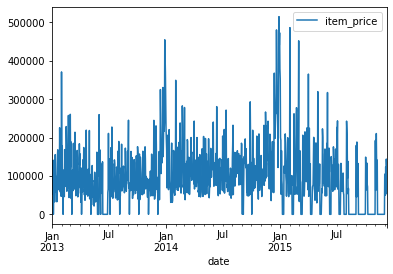

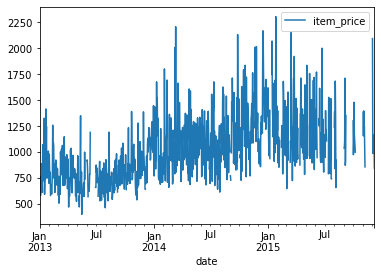

In [24]:
## item_price plot
## it shows the total sales done in that day using resampled method
## here we have sampled daily
merge_sales_train[merge_sales_train['shop_id']==27][['item_price']].resample('D').sum().plot()
merge_sales_train[merge_sales_train['shop_id']==27][['item_price']].resample('D').mean().plot()

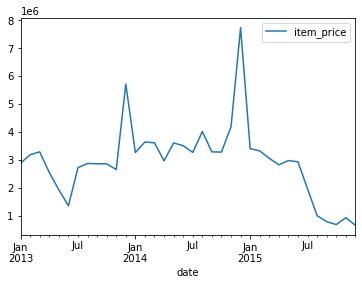

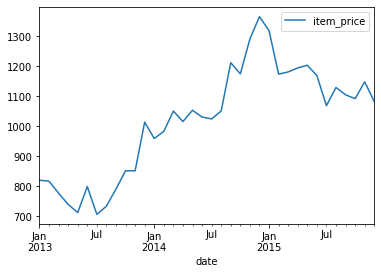

In [25]:
## item_price plot
## it shows the total sales done in that day using resampled method
## here we have sampled Monthly
merge_sales_train[merge_sales_train['shop_id']==27][['item_price']].resample('M').sum().plot()
merge_sales_train[merge_sales_train['shop_id']==27][['item_price']].resample('M').mean().plot()

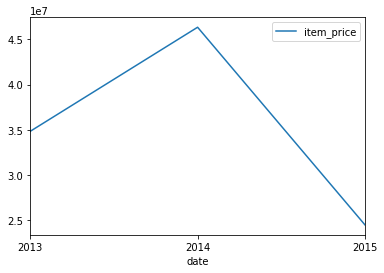

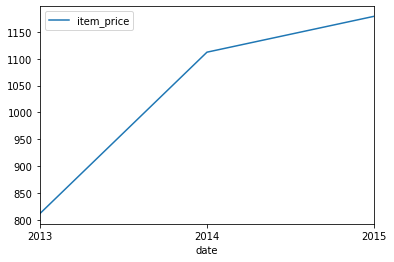

In [26]:
## item_price plot
## it shows the total sales done in that day using resampled method
## here we have sampled Yearly
merge_sales_train[merge_sales_train['shop_id']==27][['item_price']].resample('Y').sum().plot()
merge_sales_train[merge_sales_train['shop_id']==27][['item_price']].resample('Y').mean().plot()

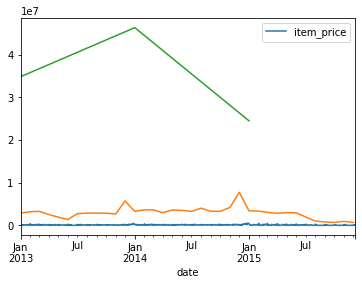

In [27]:
## combination of yearly,monthly and daily
merge_sales_train[merge_sales_train['shop_id']==27][['item_price']].resample('D').sum().plot()
merge_sales_train[merge_sales_train['shop_id']==27]['item_price'].resample('M').sum().plot()
merge_sales_train[merge_sales_train['shop_id']==27]['item_price'].resample('Y').sum().plot()

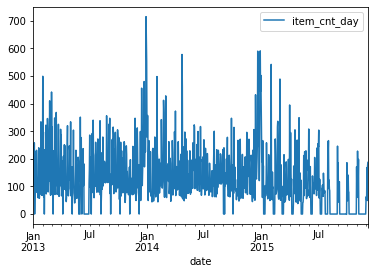

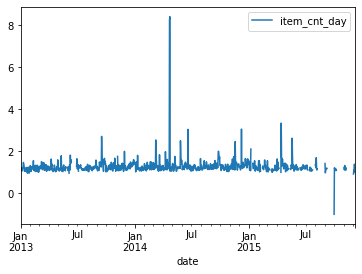

In [28]:
## ploting the resampled data of item count per day
merge_sales_train[merge_sales_train['shop_id']==27][['item_cnt_day']].resample('D').sum().plot()
merge_sales_train[merge_sales_train['shop_id']==27][['item_cnt_day']].resample('D').mean().plot()

In [30]:
test_data[test_data['shop_id']==5][test_data['item_id']==5037]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,ID,shop_id,item_id
0,0,5,5037


In [31]:
merge_sales_train[merge_sales_train['shop_id']==1]

,date_block_num,shop_id,item_id,item_price,item_cnt_day,shop_name
date,,,,,,
2013-01-02,1,1,18857,200.0,1.0,"!Якутск ТЦ ""Центральный"" фран"
2013-01-02,1,1,18864,95.0,1.0,"!Якутск ТЦ ""Центральный"" фран"
2013-01-02,1,1,18866,200.0,1.0,"!Якутск ТЦ ""Центральный"" фран"
2013-01-02,1,1,18869,200.0,1.0,"!Якутск ТЦ ""Центральный"" фран"
2013-01-02,1,1,15378,590.0,1.0,"!Якутск ТЦ ""Центральный"" фран"
...,...,...,...,...,...,...
2013-12-02,1,1,19153,221.0,1.0,"!Якутск ТЦ ""Центральный"" фран"
2013-12-02,1,1,15089,253.0,1.0,"!Якутск ТЦ ""Центральный"" фран"
2013-12-02,1,1,16852,231.0,1.0,"!Якутск ТЦ ""Центральный"" фран"


In [34]:
X_train=pd.merge(merge_sales_train,test_data[['shop_id','item_id']],on=['shop_id','item_id'],how='inner').sort_values('date_block_num',ignore_index=True)

In [46]:
X_train.drop(columns=['item_price','shop_name'])[X_train.drop(columns=['item_price','shop_name'])['shop_id']==0]

,date_block_num,shop_id,item_id,item_cnt_day


In [55]:
X_train=X_train.pivot_table(index=['shop_id','item_id'],columns='date_block_num',values='item_cnt_day',fill_value=0,aggfunc='sum')

In [59]:
dataset = merge_sales_train.pivot_table(index = ['shop_id','item_id'],values = ['item_cnt_day'],columns = ['date_block_num'],fill_value = 0,aggfunc='sum')

In [60]:
dataset.reset_index(inplace = True)

In [65]:
dataset = pd.merge(test_data,dataset,on = ['item_id','shop_id'],how = 'left')

/usr/local/lib/python3.6/dist-packages/pandas/core/reshape/merge.py:618: UserWarning: merging between different levels can give an unintended result (1 levels on the left, 2 on the right)
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:3936: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


In [66]:
# lets fill all NaN values with 0
dataset.fillna(0,inplace = True)
# lets check our data now 
dataset.head()

,ID,shop_id,item_id,"(item_cnt_day, 0)","(item_cnt_day, 1)","(item_cnt_day, 2)","(item_cnt_day, 3)","(item_cnt_day, 4)","(item_cnt_day, 5)","(item_cnt_day, 6)","(item_cnt_day, 7)","(item_cnt_day, 8)","(item_cnt_day, 9)","(item_cnt_day, 10)","(item_cnt_day, 11)","(item_cnt_day, 12)","(item_cnt_day, 13)","(item_cnt_day, 14)","(item_cnt_day, 15)","(item_cnt_day, 16)","(item_cnt_day, 17)","(item_cnt_day, 18)","(item_cnt_day, 19)","(item_cnt_day, 20)","(item_cnt_day, 21)","(item_cnt_day, 22)","(item_cnt_day, 23)","(item_cnt_day, 24)","(item_cnt_day, 25)","(item_cnt_day, 26)","(item_cnt_day, 27)","(item_cnt_day, 28)","(item_cnt_day, 29)","(item_cnt_day, 30)","(item_cnt_day, 31)","(item_cnt_day, 32)","(item_cnt_day, 33)"
0,0,5,5037,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,2.0,2.0,0.0,0.0,0.0,1.0,1.0,1.0,3.0,1.0,0.0
1,1,5,5320,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,5,5233,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,2.0,0.0,1.0,3.0,1.0
3,3,5,5232,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,4,5,5268,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [69]:
dataset.drop(['shop_id','item_id','ID'],inplace = True, axis = 1)
X_train = np.expand_dims(dataset.values[:,:-1],axis = 2)

y_train = dataset.values[:,-1:]


X_test = np.expand_dims(dataset.values[:,1:],axis = 2)


print(X_train.shape,y_train.shape,X_test.shape)


(214200, 33, 1) (214200, 1) (214200, 33, 1)


In [70]:
from keras.models import Sequential
from keras.layers import LSTM,Dense,Dropout

Using TensorFlow backend.


In [72]:
model = Sequential()
model.add(LSTM(units = 64,input_shape = (33,1)))
model.add(Dropout(0.4))
model.add(Dense(1))

model.compile(loss = 'mse',optimizer = 'adam', metrics = ['mean_squared_error'])
model.summary()


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 64)                16896     
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 16,961
Trainable params: 16,961
Non-trainable params: 0
_________________________________________________________________


In [73]:
model.fit(X_train,y_train,batch_size = 4096,epochs = 10)

Epoch 1/10
214200/214200 [==============================] - 6s 26us/step - loss: 30.6963 - mean_squared_error: 30.6963
Epoch 2/10
214200/214200 [==============================] - 4s 17us/step - loss: 30.3600 - mean_squared_error: 30.3600
Epoch 3/10
214200/214200 [==============================] - 4s 17us/step - loss: 30.1316 - mean_squared_error: 30.1316
Epoch 4/10
214200/214200 [==============================] - 4s 17us/step - loss: 29.9897 - mean_squared_error: 29.9897
Epoch 5/10
214200/214200 [==============================] - 4s 17us/step - loss: 29.8651 - mean_squared_error: 29.8651
Epoch 6/10
214200/214200 [==============================] - 4s 17us/step - loss: 29.8303 - mean_squared_error: 29.8303
Epoch 7/10
214200/214200 [==============================] - 4s 17us/step - loss: 29.7107 - mean_squared_error: 29.7107
Epoch 8/10
214200/214200 [==============================] - 4s 17us/step - loss: 29.6786 - mean_squared_error: 29.6786
Epoch 9/10
214200/214200 [======================

In [76]:
submission_pfs = my_model.predict(X_test)
submission_pfs = submission_pfs.clip(0,20)
submission = pd.DataFrame({'ID':test_data['ID'],'item_cnt_month':submission_pfs.ravel()})
submission.to_csv('sub_pfs.csv',index = False)

In [78]:
submission['item_cnt_month'].unique()

array([0.0000000e+00, 6.2315274e-05, 1.0846257e-05, 1.7354314e-04,
       6.3672831e-04, 1.0192555e-03, 1.0129756e-03, 5.1678659e-04,
       2.5299325e-05, 8.1658028e-03, 2.3284038e-04, 2.1347142e-04,
       5.8663572e-05, 8.5799707e-05, 8.6280343e-06, 9.1158005e-04,
       2.0688642e-05], dtype=float32)